# Preprocessing data with Scikit-learn[🔗](https://scikit-learn.org/stable/modules/preprocessing.html)

This code is written for exploring on major functions of Scikit-learn, expecially with preprocessing, using **Covtype** dataset of Scikit-learn. Based on Scikit-learn User Guide document, added and modified code for learning and experimenting.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Use Covertype Dataset from Scikit-learn [🔗](https://archive.ics.uci.edu/dataset/31/covertype)
: Predicting forest cover type from cartographic variables only (no remotely sensed data). 

Name | Data Type | Measurement | Description|
|---|---|---|---|
Elevation | quantitative |meters | Elevation in meters
Aspect | quantitative | azimuth | Aspect in degrees azimuth
Slope | quantitative | degrees | Slope in degrees
Horizontal_Distance_To_Hydrology | quantitative | meters | Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology | quantitative | meters | Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways | quantitative | meters | Horz Dist to nearest roadway
Hillshade_9am | quantitative | 0 to 255 index | Hillshade index at 9am, summer solstice
Hillshade_Noon | quantitative | 0 to 255 index | Hillshade index at noon, summer soltice
Hillshade_3pm | quantitative | 0 to 255 index | Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points | quantitative | meters | Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) | qualitative | 0 (absence) or 1 (presence) | Wilderness area designation
Soil_Type (40 binary columns) | qualitative | 0 (absence) or 1 (presence) | Soil Type designation
Cover_Type (7 types) | integer | 1 to 7 | Forest Cover Type designation

In [8]:
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()
df_features = pd.DataFrame(covtype.data, columns=covtype.feature_names)
df_target = pd.DataFrame(covtype.target, columns=covtype.target_names)
df = pd.concat([df_features, df_target], axis=1)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [10]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [11]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((406708, 54), (174304, 54), (406708, 1), (174304, 1))

## Standardization

### StandardScaler
Transform the data to be centered around zero and have unit variance: $z = (x - u) / s$
- Can accept `scipy.sparse` matrics as input, with `with_mean=False`

In [18]:
# Use StandardScaler to transform quantitative data
from sklearn.preprocessing import StandardScaler

stsc = StandardScaler()
X_train_stsc = stsc.fit_transform(X_train.iloc[:, :9])
X_train_stsc[:10]

array([[-1.21328492,  1.52196968, -1.21575589, -0.98565349, -0.70990219,
        -0.96248441, -0.22956674,  0.541278  ,  0.61403226],
       [ 0.66694668, -0.68431193, -0.41394503, -0.44437279,  0.18271404,
        -0.8310527 ,  0.81701908, -0.16698871, -0.66774488],
       [ 0.17815782,  1.03962471, -0.28030989,  1.44775627, -0.22926268,
         2.016207  , -0.86499385,  0.99659231,  1.34647634],
       [-0.28922423,  0.51261817,  1.59058211, -0.95270597, -0.19493129,
         0.38965941, -0.93974998,  1.5024971 ,  1.24184147],
       [ 0.74543832, -1.06840144, -1.08212075, -0.36435738, -0.34942256,
         0.47364748,  0.29372617,  0.13655417, -0.01377695],
       [ 0.08896277, -1.38996475,  1.72421725, -0.70324617,  0.23421113,
        -1.24522288, -1.61255515, -2.29178883, -0.14457054],
       [ 1.13432873, -0.30915473, -0.28030989, -0.56204251,  0.02822277,
         0.9057693 ,  1.04128747,  0.33891608, -0.66774488],
       [ 0.88458259,  1.48624042, -0.14667475, -0.50556104, -0

In [20]:
# Apply scaling and classifier for training set and testing set with Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :9], y_train)
pipe.score(X_test.iloc[:, :9], y_test)

0.8540767853864513

### MinMaxScaler
Scale features to lie between a given minimum and maximum value
- Can set the minimum and maximum: feature_range=(0, 1)

In [22]:
from sklearn.preprocessing import MinMaxScaler

pipe = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :9], y_train)
pipe.score(X_test.iloc[:, :9], y_test)

0.8547709748485405

### MaxAbsScaler
Scale features so that maximum absolute value of each feature is scaled to unit size
- Training data lies within the range [-1, 1]
- Doesn't reduce the effect of outliers
- Designed for sparse data

In [24]:
from sklearn.preprocessing import MaxAbsScaler

pipe = make_pipeline(MaxAbsScaler(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :9], y_train)
pipe.score(X_test.iloc[:, :9], y_test)

0.8548570313934276

### RobustScaler
: Scale features using statistics that are robust to outliers
- Removes the median and scales the data according to IQR on default
- Cannot be fitted to sparse inputs, but can transform them
- Useful for data with many outliers as a drop-in replacement instead

In [26]:
from sklearn.preprocessing import RobustScaler

pipe = make_pipeline(RobustScaler(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :9], y_train)
pipe.score(X_test.iloc[:, :9], y_test)

0.8539218836056545

## Non-linear transformation
- Preserve the rank of the values along each features

### Quantile transforms
- Smooths out unusaual distributions
- Less influenced by outliers than scaling methods
- Distorts correlations and distances

In [34]:
from sklearn.preprocessing import QuantileTransformer

pipe = make_pipeline(QuantileTransformer(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :9], y_train)
pipe.score(X_test.iloc[:, :9], y_test)

0.8552242059849459

In [76]:
# Transformed data
X_train_qt = QuantileTransformer().fit_transform(X_train.iloc[:, :9])
X_train_qt

array([[0.11661662, 0.88888889, 0.08558559, ..., 0.32882883, 0.68318318,
        0.73773774],
       [0.72322322, 0.34384384, 0.38288288, ..., 0.79479479, 0.38888889,
        0.23373373],
       [0.52202202, 0.77477477, 0.44294294, ..., 0.16716717, 0.84584585,
        0.91741742],
       ...,
       [0.73273273, 0.8003003 , 0.6976977 , ..., 0.07657658, 0.74474474,
        0.95345345],
       [0.61261261, 0.96096096, 0.82882883, ..., 0.0990991 , 0.12762763,
        0.67917918],
       [0.54304304, 0.11261261, 0.65565566, ..., 0.3968969 , 0.14364364,
        0.30880881]])

In [78]:
# The percentile values of each column matches the percentiles previously defined
np.percentile(X_train_qt[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.24824825, 0.5015015 , 0.74924925, 1.        ])

In [158]:
# Can change marginal distribution for the transformed data to normal(default='uniform')
X_train_qt = QuantileTransformer(output_distribution='normal').fit_transform(X_train.iloc[:, :9])
X_train_qt

array([[-1.17188995,  1.25298763, -1.36845029, ..., -0.43210422,
         0.50777433,  0.61199579],
       [ 0.63792343, -0.40335554, -0.28613494, ...,  0.83023416,
        -0.31633038, -0.72497321],
       [ 0.05522909,  0.73808885, -0.13844354, ..., -0.93585209,
         1.03793719,  1.34949764],
       ...,
       [ 0.66741904,  0.81790154,  0.53218973, ..., -1.41129327,
         0.68317781,  1.66911246],
       [ 0.29005812,  1.79866258,  0.95943959, ..., -1.25850769,
        -1.14489597,  0.45424896],
       [ 0.10810309, -1.22328725,  0.40471681, ..., -0.25490199,
        -1.06852162, -0.50492201]])

### Power transforms
- Map data from any distribution to as close to a Gaussian distribution
- Stabilize variance, minimize skewness
1. Yeo-Johnson
2. Box-Cox
   - Can be applied striclty to positive data

In [100]:
from sklearn.preprocessing import PowerTransformer

pt_yj = PowerTransformer(method='yeo-johnson')
X_train_pt_yj = pt_yj.fit_transform(X_train.iloc[:, :9])

pt_bc = PowerTransformer(method='box-cox')
X_train_pt_bc = pt_bc.fit_transform(X_train.iloc[:, :1])

In [101]:
# lambda values for each features
pt_yj.lambdas_

array([3.79003523, 0.45638577, 0.40758322, 0.43705406, 0.86349833,
       0.39166224, 3.89918211, 4.51160037, 1.2319745 ])

In [102]:
pt_bc.lambdas_

array([3.78903129])

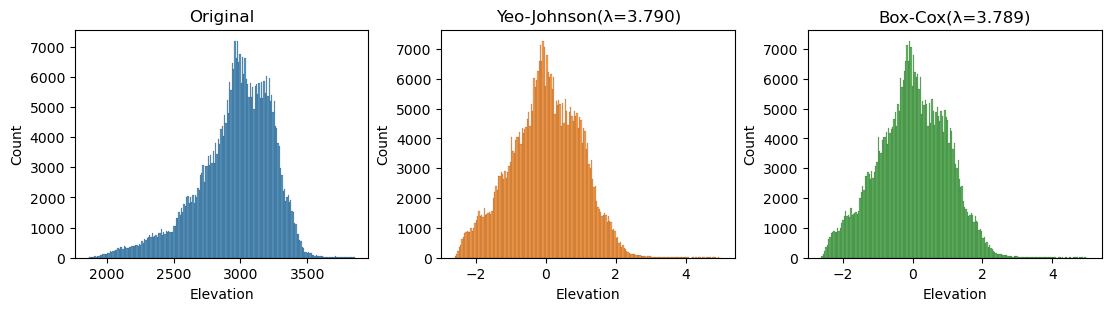

In [156]:
fig, axes = plt.subplots(figsize=(11, 3), nrows=1, ncols=3, layout='constrained')

sns.histplot(data=X_train, x='Elevation', ax=axes[0], color='C0')
sns.histplot(data=X_train_pt_yj[:, 0], ax=axes[1], color='C1')
sns.histplot(data=X_train_pt_bc[:, 0], ax=axes[2], color='C2')

axes[0].set_title('Original')
axes[1].set_title('Yeo-Johnson(λ=3.790)')
axes[2].set_title('Box-Cox(λ=3.789)')

axes[1].set_xlabel('Elevation')
axes[2].set_xlabel('Elevation')

plt.show()

## Normalization
* Scale individual samples to have unit norm